<a href="https://colab.research.google.com/github/adnanabbasshah/Animated-Wind-Map-using-R/blob/main/data_processing_and_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gdown

# Download the folder using gdown
!gdown --folder https://drive.google.com/drive/folders/18jfbo2AHBSSOm_XEjg4Wq_D7T1y6VmEE?usp=sharing


Retrieving folder contents
Retrieving folder 1rlmFgYEtUcaPQVXMuze_XKdwYuR2Ox72 project
Processing file 1nCNf23pMFVq9CvPjGs_gw-0FwKqJaPk1 data processing and viz.ipynb
Processing file 1-_FZlMkeezwBUj5ojg2YtC40B62FqAq8 initial processing (data Extraction).R
Retrieving folder 1m7xTIJZ1usjwJ15yZyGy7gzsRKzfUhp8 files
Processing file 1IXqza7D0mSsum5wlEbPJwdCWxIUNTd_8 cleared_quantities.parquet
Processing file 1xtgXqt9uO1R-JfbDY1UchfFaumpMaC50 merged_energy_bids.parquet
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nCNf23pMFVq9CvPjGs_gw-0FwKqJaPk1
To: /content/energycontrol/project/data processing and viz.ipynb
100% 112k/112k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-_FZlMkeezwBUj5ojg2YtC40B62FqAq8
To: /content/energycontrol/project/initial processing (data Extraction).R
100% 3.99k/3.99k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.go

In [3]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.5 MB/s eta 0:00:00


In [7]:
import pandas as pd

bids = pd.read_parquet("/content/energycontrol/project/files/merged_energy_bids.parquet", engine='fastparquet')
cleared = pd.read_parquet("/content/energycontrol/project/files/cleared_quantities.parquet", engine='fastparquet')

bids['dispatchInterval'] = pd.to_datetime(bids['dispatchInterval'])
cleared['dispatchInterval'] = pd.to_datetime(cleared['dispatchInterval'])

bids_unique = bids.drop_duplicates(subset=["dispatchInterval", "facilityCode"])
cleared_unique = cleared.drop_duplicates(subset=["dispatchInterval", "facilityCode"])

merged = pd.merge(
    bids_unique,
    cleared_unique,
    on=["dispatchInterval", "facilityCode"],
    how="inner"
)

print("Merged rows:", len(merged))
print(merged.head())


Merged rows: 40896
           dispatchInterval    facilityCode  quantity  submittedPrice  \
0 2024-12-29 08:00:00+08:00       ALCOA_WGP      0.00         -987.10   
1 2024-12-29 08:00:00+08:00  AMBRISOLAR_PV1      0.96        -1075.91   
2 2024-12-29 08:00:00+08:00  BREMER_BAY_WF1      0.60        -1372.04   
3 2024-12-29 08:00:00+08:00   COCKBURN_CCG1    240.00          101.55   
4 2024-12-29 08:00:00+08:00       COLLIE_G1    120.00         -971.90   

   lfaPrice        fuelType  clearedQuantity  
0  -1000.00      NON-LIQUID            0.000  
1  -1000.00         UNKNOWN            0.120  
2  -1000.00  NOT APPLICABLE            0.112  
3    101.71  NOT APPLICABLE            0.000  
4  -1000.00      NON-LIQUID          120.000  


In [8]:
import pandas as pd

def get_unique_intervals_per_day(df: pd.DataFrame, time_column: str) -> pd.Series:
    df[time_column] = pd.to_datetime(df[time_column])
    return df.groupby(df[time_column].dt.date)[time_column].nunique()

def get_unique_intervals_per_hour(df: pd.DataFrame, time_column: str) -> pd.Series:
    return df.groupby(df[time_column].dt.floor('H'))[time_column].nunique()

def main():
    df = cleared.copy()
    daily_counts = get_unique_intervals_per_day(df, 'dispatchInterval')
    hourly_counts = get_unique_intervals_per_hour(df, 'dispatchInterval')

    print("Unique 5-min intervals per day:")
    print(daily_counts)

    print("\nUnique 5-min intervals per hour:")
    print(hourly_counts.head(24))

    print("\nExpected 5-min intervals per day: 288")

if __name__ == "__main__":
    main()


/tmp/ipython-input-8-2766082070.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return df.groupby(df[time_column].dt.floor('H'))[time_column].nunique()


Unique 5-min intervals per day:
dispatchInterval
2024-12-28    192
2024-12-29    288
2024-12-30    288
2024-12-31    288
2025-01-01    119
2025-01-02    192
2025-01-03    288
2025-01-04    288
2025-01-05    119
Name: dispatchInterval, dtype: int64

Unique 5-min intervals per hour:
dispatchInterval
2024-12-28 08:00:00+08:00    12
2024-12-28 09:00:00+08:00    12
2024-12-28 10:00:00+08:00    12
2024-12-28 11:00:00+08:00    12
2024-12-28 12:00:00+08:00    12
2024-12-28 13:00:00+08:00    12
2024-12-28 14:00:00+08:00    12
2024-12-28 15:00:00+08:00    12
2024-12-28 16:00:00+08:00    12
2024-12-28 17:00:00+08:00    12
2024-12-28 18:00:00+08:00    12
2024-12-28 19:00:00+08:00    12
2024-12-28 20:00:00+08:00    12
2024-12-28 21:00:00+08:00    12
2024-12-28 22:00:00+08:00    12
2024-12-28 23:00:00+08:00    12
2024-12-29 00:00:00+08:00    12
2024-12-29 01:00:00+08:00    12
2024-12-29 02:00:00+08:00    12
2024-12-29 03:00:00+08:00    12
2024-12-29 04:00:00+08:00    12
2024-12-29 05:00:00+08:00    

In [13]:
import pandas as pd

# Assuming 'merged' is your merged DataFrame from previous step
merged = merged.copy()  # safe copy

# Calculate curtailment (MWh curtailed)
merged['curtailment'] = merged['quantity'] - merged['clearedQuantity']

# Extract hour from dispatchInterval (floor to hour)
merged['hour'] = merged['dispatchInterval'].dt.floor('H')

# Aggregate curtailment by hour (sum over all facilityCodes & 5-min intervals within hour)
hourly_curtailment = merged.groupby('hour')['curtailment'].sum().reset_index()

# Rename columns for clarity
hourly_curtailment.columns = ['hour', 'total_curtailment_MWh']

# Save to CSV
hourly_curtailment.to_csv('hourly_curtailment.csv', index=False)

print("✅ Hourly curtailment saved to 'hourly_curtailment.csv'")
print(hourly_curtailment.head(10))


✅ Hourly curtailment saved to 'hourly_curtailment.csv'
                       hour  total_curtailment_MWh
0 2024-12-28 08:00:00+08:00              23968.212
1 2024-12-28 09:00:00+08:00              28576.790
2 2024-12-28 10:00:00+08:00              29149.631
3 2024-12-28 11:00:00+08:00              26988.972
4 2024-12-28 12:00:00+08:00              25354.959
5 2024-12-28 13:00:00+08:00              22852.492
6 2024-12-28 14:00:00+08:00              18930.002
7 2024-12-28 15:00:00+08:00              17059.389
8 2024-12-28 16:00:00+08:00              14426.721
9 2024-12-28 17:00:00+08:00              12611.183


/tmp/ipython-input-13-2601614327.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['hour'] = merged['dispatchInterval'].dt.floor('H')


In [14]:
import pandas as pd

# Assuming 'hourly_curtailment' dataframe with 'hour' and 'total_curtailment_MWh'

# Create full hourly ranges for all days between min and max hour
full_range = pd.date_range(start=hourly_curtailment['hour'].min(),
                           end=hourly_curtailment['hour'].max(),
                           freq='H', tz=hourly_curtailment['hour'].dt.tz)

# Reindex and fill missing with zero
hourly_curtailment_full = hourly_curtailment.set_index('hour').reindex(full_range, fill_value=0).rename_axis('hour').reset_index()

print(hourly_curtailment_full)


                        hour  total_curtailment_MWh
0  2024-12-28 08:00:00+08:00              23968.212
1  2024-12-28 09:00:00+08:00              28576.790
2  2024-12-28 10:00:00+08:00              29149.631
3  2024-12-28 11:00:00+08:00              26988.972
4  2024-12-28 12:00:00+08:00              25354.959
5  2024-12-28 13:00:00+08:00              22852.492
6  2024-12-28 14:00:00+08:00              18930.002
7  2024-12-28 15:00:00+08:00              17059.389
8  2024-12-28 16:00:00+08:00              14426.721
9  2024-12-28 17:00:00+08:00              12611.183
10 2024-12-28 18:00:00+08:00              10850.486
11 2024-12-28 19:00:00+08:00               9752.872
12 2024-12-28 20:00:00+08:00              10148.477
13 2024-12-28 21:00:00+08:00              11471.738
14 2024-12-28 22:00:00+08:00              13972.161
15 2024-12-28 23:00:00+08:00              15262.564
16 2024-12-29 00:00:00+08:00              17670.899
17 2024-12-29 01:00:00+08:00              16766.446
18 2024-12-2

/tmp/ipython-input-14-365465890.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=hourly_curtailment['hour'].min(),


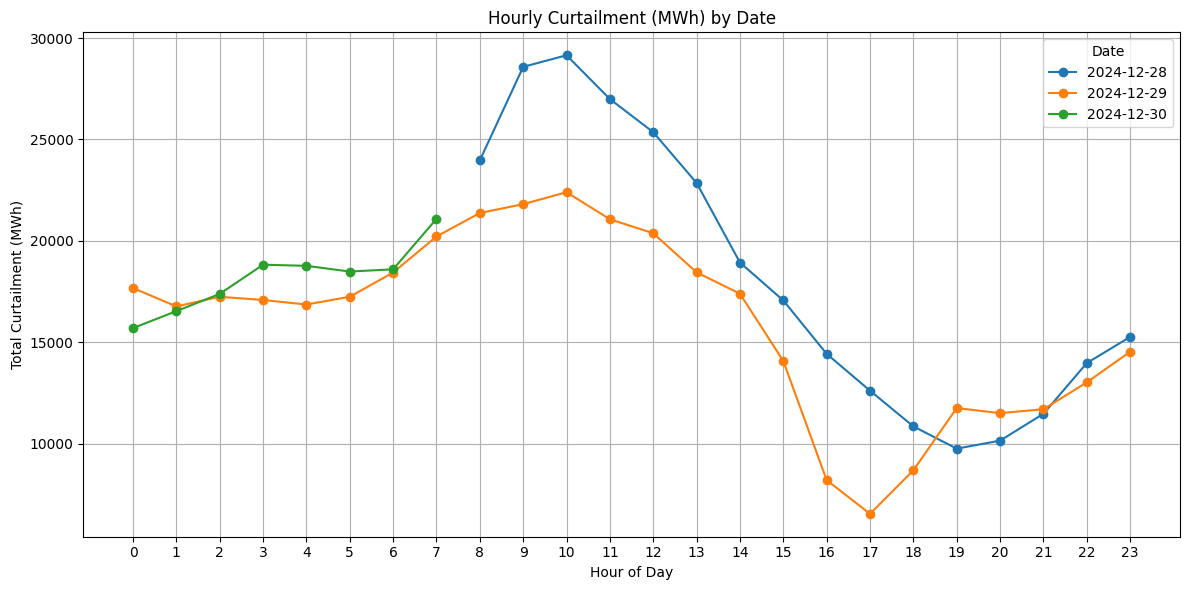

In [15]:
import matplotlib.pyplot as plt

# First, extract date and hour from 'hour' column
hourly_curtailment_full['date'] = hourly_curtailment_full['hour'].dt.date
hourly_curtailment_full['hour_only'] = hourly_curtailment_full['hour'].dt.hour

# Pivot data to have dates as columns and hour_only as index
pivot_df = hourly_curtailment_full.pivot(index='hour_only', columns='date', values='total_curtailment_MWh')

# Plot
plt.figure(figsize=(12,6))
for date in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[date], marker='o', label=str(date))

plt.title('Hourly Curtailment (MWh) by Date')
plt.xlabel('Hour of Day')
plt.ylabel('Total Curtailment (MWh)')
plt.xticks(range(0,24))
plt.legend(title='Date')
plt.grid(True)
plt.tight_layout()
plt.show()


,dispatchInterval,facilityCode,quantity,submittedPrice,lfaPrice,fuelType,clearedQuantity,curtailment,hour
0,2024-12-29 08:00:00+08:00,ALCOA_WGP,0.00,-987.10,-1000.00,NON-LIQUID,0.000,0.000,2024-12-29 08:00:00+08:00
1,2024-12-29 08:00:00+08:00,AMBRISOLAR_PV1,0.96,-1075.91,-1000.00,UNKNOWN,0.120,0.840,2024-12-29 08:00:00+08:00
2,2024-12-29 08:00:00+08:00,BREMER_BAY_WF1,0.60,-1372.04,-1000.00,NOT APPLICABLE,0.112,0.488,2024-12-29 08:00:00+08:00
3,2024-12-29 08:00:00+08:00,COCKBURN_CCG1,240.00,101.55,101.71,NOT APPLICABLE,0.000,240.000,2024-12-29 08:00:00+08:00
4,2024-12-29 08:00:00+08:00,COLLIE_G1,120.00,-971.90,-1000.00,NON-LIQUID,120.000,0.000,2024-12-29 08:00:00+08:00
...,...,...,...,...,...,...,...,...,...
40891,2024-12-29 07:55:00+08:00,SBSOLAR1_CUNDERDIN_PV1,0.00,-1029.80,-1000.00,NON-LIQUID,0.000,0.000,2024-12-29 07:00:00+08:00
40892,2024-12-29 07:55:00+08:00,ALINTA_WGP_GT,0.00,-982.60,-1000.00,NON-LIQUID,0.000,0.000,2024-12-29 07:00:00+08:00
40893,2024-12-29 07:55:00+08:00,ALINTA_WGP_U2,0.00,-982.60,-1000.00,NON-LIQUID,0.000,0.000,2024-12-29 07:00:00+08:00
40894,2024-12-29 07:55:00+08:00,KWINANA_ESR2,0.00,-998.30,-1000.00,NOT APPLICABLE,0.000,0.000,2024-12-29 07:00:00+08:00
